In [ ]:
minrmseval = 999999999999999
min_p = 4
min_q = 4
min_r = 4
for  in range(3):
    for q in range(3):
        for r in range(3):
            model = sm.tsa.statespace.SARIMAX(endog_train,order = (p,q,r), seasonal_order = (0,0,0,52), enforce_invertibility=False).fit()
            prediction = model.predict(start=109, end=143)
            rmseval = np.sqrt(mean_squared_error(predict,validation))
            if minrmseval>rmseval:
                minrmseval = rmseval
                min_p = p
                min_q = q
                min_r = r

print(min_p)
print(min_q)
print(min_r)
print(minrmseval)

<h2>Mastek ML Project1</h2>
<h3>Walmart sales prediction</h3>
<P>_________________________________
    <ul>
        <li>Authors: Group 3</li>
        <li>Description: Project to predict sales of walmart.</li>
    </ul>
 </p>

In [2]:
import pandas as pd
import numpy as np
import os
import sklearn as sc

In [2]:
# Using os package to get data path so that code can run in both unix and windows systems.
data_path = os.path.join(os.getcwd(),os.pardir,'data')
sales_path = os.path.join(data_path,'sales_training.csv')
stores_path = os.path.join(data_path,'stores.csv')

In [3]:
# Read data from sales_training csv to dataframes
sales = pd.read_csv(sales_path,parse_dates=['Date'])
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# Read data from stores csv to dataframe
stores = pd.read_csv(stores_path)
stores.info()
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# Join sales and stores to create final_raw_data
raw_final_data = pd.merge(sales,stores,on='Store')
raw_final_data.info()
raw_final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 22.9+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [6]:
raw_final_data.head(15)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
5,1,1,2010-03-12,21043.39,False,A,151315
6,1,1,2010-03-19,22136.64,False,A,151315
7,1,1,2010-03-26,26229.21,False,A,151315
8,1,1,2010-04-02,57258.43,False,A,151315
9,1,1,2010-04-09,42960.91,False,A,151315


In [7]:
# Convert column names into lower case
raw_final_data.columns=[i.lower() for i in list(raw_final_data.columns)]
raw_final_data.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size'], dtype='object')

In [8]:
# convert isholiday column to numerical column by using categorical freature encoding : 0(false) and 1(true)
raw_final_data['holiday']=[int(i) for i in raw_final_data['isholiday']]
raw_final_data['holiday'].head()

0    0
1    1
2    0
3    0
4    0
Name: holiday, dtype: int64

In [9]:
from datetime import datetime

In [10]:
# create day month year columns using date column
raw_final_data['day'] = [i.day for i in raw_final_data['date']]
raw_final_data['month'] = [i.month for i in raw_final_data['date']]
raw_final_data['year']=[i.year for i in raw_final_data['date']]
raw_final_data['wk_nbr'] = pd.DatetimeIndex(raw_final_data['date']).week 
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr
0,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5
1,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6
2,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7
3,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8
4,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9


In [11]:
# change index of dataframe to YYYYMMDD_storedept
raw_final_data['index'] = [str(a)+str(b)+str(c)+'_'+str(d)+str(e) for a,b,c,d,e in zip(raw_final_data['year'],raw_final_data['month'],raw_final_data['day'],raw_final_data['store'],raw_final_data['dept'])]
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,index
0,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5,201025_11
1,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6,2010212_11
2,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7,2010219_11
3,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8,2010226_11
4,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9,201035_11


In [12]:
# create custome indexs to access rows easily and efficiently
raw_final_data.set_index('index',inplace=True)
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr
index,,,,,,,,,,,,
201025_11,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5
2010212_11,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6
2010219_11,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7
2010226_11,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8
201035_11,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9


In [13]:
# create quarter column
raw_final_data['quarter']=raw_final_data.month.apply(lambda x: 1 if x<=3 else (2 if x<=6 else (3 if x<=9 else 4)))
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,quarter
index,,,,,,,,,,,,,
201025_11,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5,1
2010212_11,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6,1
2010219_11,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7,1
2010226_11,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8,1
201035_11,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9,1


In [14]:
# create column sales_diff = sale_of_curr_week-sale_of_prev_week for each store and department
# Sorting dataframe in ascending order of dates
raw_final_data=raw_final_data.sort_values('date')
temp_df = raw_final_data.groupby(['store','dept'], group_keys=False)
raw_final_data = temp_df.apply(lambda x: x.sort_values('date',ascending=True))

# create column sales_diff
temp_df = raw_final_data.groupby(['store','dept'], group_keys=False)
raw_final_data['sales_diff'] = temp_df.weekly_sales.apply(lambda x: x-x.shift(1))
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,quarter,sales_diff
index,,,,,,,,,,,,,,
201025_11,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5,1,NaN
2010212_11,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6,1,21114.99
2010219_11,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7,1,-4443.94
2010226_11,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8,1,-22192.01
201035_11,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9,1,2424.36


In [15]:
#replace null in sales_diff
raw_final_data['sales_diff']=raw_final_data.sales_diff.fillna(0)
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,quarter,sales_diff
index,,,,,,,,,,,,,,
201025_11,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5,1,0.00
2010212_11,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6,1,21114.99
2010219_11,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7,1,-4443.94
2010226_11,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8,1,-22192.01
201035_11,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9,1,2424.36


<h2>Nulls and outliers</h2>

In [16]:
%matplotlib inline

In [17]:
# find if any null values are there
raw_final_data.isnull().sum()

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
type            0
size            0
holiday         0
day             0
month           0
year            0
wk_nbr          0
quarter         0
sales_diff      0
dtype: int64

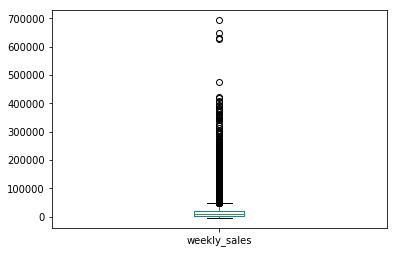

In [18]:
# box plot for the weekly_sales
raw_final_data.weekly_sales.plot(kind='box')

In [19]:
#raw_final_data.size.plot(kind='box')

In [20]:

# Examining Outliers (Looks like the rows with weekly_sales>>600000 are kind of outliers.)
raw_final_data.loc[raw_final_data.weekly_sales>=600000]

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,quarter,sales_diff
index,,,,,,,,,,,,,,
20101126_1072,10,72,2010-11-26,693099.36,True,B,126512,1,26,11,2010,47,4,562532.82
20111125_1072,10,72,2011-11-25,630999.19,True,B,126512,1,25,11,2011,47,4,488269.18
20101126_3572,35,72,2010-11-26,627962.93,True,B,103681,1,26,11,2010,47,4,568347.70
20111125_3572,35,72,2011-11-25,649770.18,True,B,103681,1,25,11,2011,47,4,557005.55


In [21]:
# % of rows with weekly_sales>600000
(len(raw_final_data.loc[raw_final_data.weekly_sales>=600000])/len(raw_final_data))*100

0.0009488341200749579

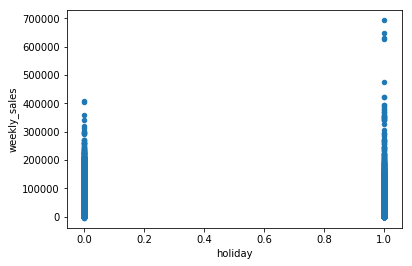

In [22]:
# important thing is isholiday is set to true for these outliers. Lets analyze other rows with isholiday = true
raw_final_data.plot(kind='scatter',x='holiday',y='weekly_sales')

In [23]:
# how frequent are outliers?
outliers_days = len(raw_final_data.loc[raw_final_data.weekly_sales>=600000]['date'].unique())
total_days = (len(raw_final_data['date'].unique()))
print('out of ',str(total_days),', ',str(outliers_days),'days contains outliers data')

out of  143 ,  2 days contains outliers data


### commented following line
#### raw_final_data.drop(index=raw_final_data.loc[raw_final_data.weekly_sales>=600000].index,axis=0,inplace = True)

In [24]:
# since % of outlier rows is very low(0.0009%),
# since event with outliers as data may happen twice in 4.7 months and 
# since we dont have domain knowledge to analyze outliers, lets drop those rows
#raw_final_data.drop(index=raw_final_data.loc[raw_final_data.weekly_sales>=600000].index,axis=0,inplace = True)

In [25]:
# check if outlier columns are dropped?
(len(raw_final_data.loc[raw_final_data.weekly_sales>=600000])/len(raw_final_data))*100

0.0009488341200749579

<h3>Treat Negative sales values</h3>

In [26]:
# Finde % of -ve sales values
((len(raw_final_data.loc[raw_final_data.weekly_sales<0]))/len(raw_final_data))*100

0.30481296107408024

### Commented following line
#### raw_final_data.drop(index=raw_final_data.loc[raw_final_data.weekly_sales<0].index,axis=0,inplace = True)

In [27]:
# Since % is very low, we can drop the rows
# raw_final_data.drop(index=raw_final_data.loc[raw_final_data.weekly_sales<0].index,axis=0,inplace = True)

In [28]:
# Check wheter -ve rows are droppted successfully 
((len(raw_final_data.loc[raw_final_data.weekly_sales<0]))/len(raw_final_data))*100

0.30481296107408024

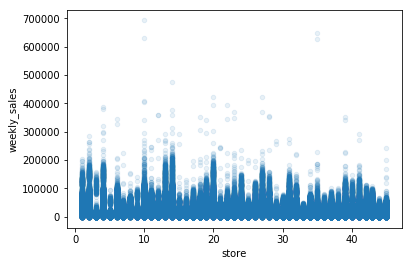

In [29]:
# store vs weekly_sales
raw_final_data.plot(kind='scatter', x='store', y='weekly_sales', alpha = 0.1);

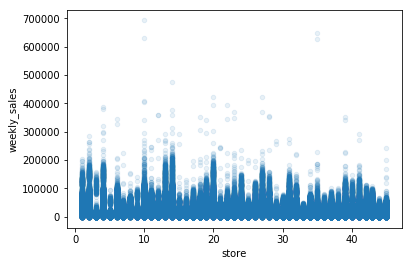

In [30]:
# store vs weekly_sales
raw_final_data.plot(kind='scatter', x='store', y='weekly_sales', alpha = 0.1);

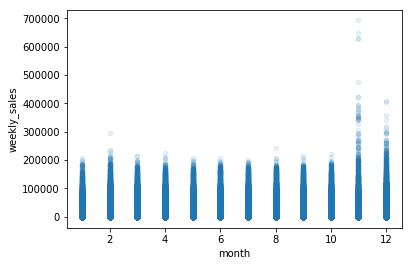

In [31]:
# month vs sales
raw_final_data.plot(kind='scatter', x='month', y='weekly_sales', alpha = 0.1);

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 201025_11 to 20121026_4598
Data columns (total 14 columns):
store           421570 non-null int64
dept            421570 non-null int64
date            421570 non-null datetime64[ns]
weekly_sales    421570 non-null float64
isholiday       421570 non-null bool
type            421570 non-null object
size            421570 non-null int64
holiday         421570 non-null int64
day             421570 non-null int64
month           421570 non-null int64
year            421570 non-null int64
wk_nbr          421570 non-null int64
quarter         421570 non-null int64
sales_diff      421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 55.4+ MB


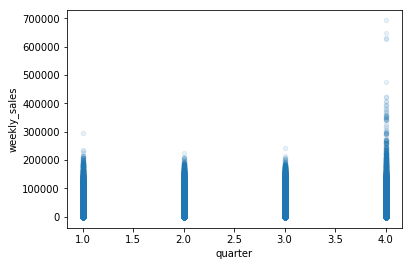

In [32]:
# month vs sales
raw_final_data.plot(kind='scatter', x='quarter', y='weekly_sales', alpha = 0.1);
raw_final_data.info()

<h3>Find important columns</h3>

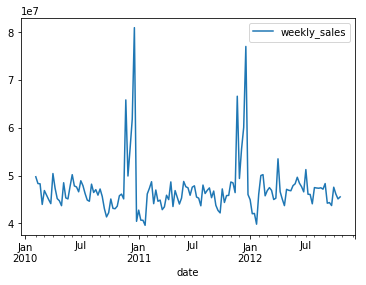

In [33]:
# date vs sales
temp_data = raw_final_data[['date','weekly_sales']].groupby('date').sum()
temp_data.plot()

In [34]:
# looking at the data
raw_final_data.head()

,store,dept,date,weekly_sales,isholiday,type,size,holiday,day,month,year,wk_nbr,quarter,sales_diff
index,,,,,,,,,,,,,,
201025_11,1,1,2010-02-05,24924.50,False,A,151315,0,5,2,2010,5,1,0.00
2010212_11,1,1,2010-02-12,46039.49,True,A,151315,1,12,2,2010,6,1,21114.99
2010219_11,1,1,2010-02-19,41595.55,False,A,151315,0,19,2,2010,7,1,-4443.94
2010226_11,1,1,2010-02-26,19403.54,False,A,151315,0,26,2,2010,8,1,-22192.01
201035_11,1,1,2010-03-05,21827.90,False,A,151315,0,5,3,2010,9,1,2424.36


In [35]:
# finding correlation matrix
raw_final_data.corr()

,store,dept,weekly_sales,isholiday,size,holiday,day,month,year,wk_nbr,quarter,sales_diff
store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.000548,-0.000015,0.001011,0.002997,0.001031,0.001036,0.000761
dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.000916,-0.000678,0.000904,0.003738,0.000882,0.000723,-0.001137
weekly_sales,-0.085195,0.148032,1.000000,0.012774,0.243828,0.012774,-0.006187,0.028409,-0.010111,0.027673,0.023838,0.154065
isholiday,-0.000548,0.000916,0.012774,1.000000,0.000593,1.000000,0.045465,0.123376,-0.056746,0.128184,0.081870,-0.033133
size,-0.182881,-0.002966,0.243828,0.000593,1.000000,0.000593,-0.000386,-0.001210,-0.004975,-0.001292,-0.001259,-0.000717
holiday,-0.000548,0.000916,0.012774,1.000000,0.000593,1.000000,0.045465,0.123376,-0.056746,0.128184,0.081870,-0.033133
day,-0.000015,-0.000678,-0.006187,0.045465,-0.000386,0.045465,1.000000,0.016363,0.005835,0.104719,0.023542,-0.049343
month,0.001011,0.000904,0.028409,0.123376,-0.001210,0.123376,0.016363,1.000000,-0.194288,0.995999,0.967164,-0.004518
year,0.002997,0.003738,-0.010111,-0.056746,-0.004975,-0.056746,0.005835,-0.194288,1.000000,-0.181797,-0.184993,0.003599
wk_nbr,0.001031,0.000882,0.027673,0.128184,-0.001292,0.128184,0.104719,0.995999,-0.181797,1.000000,0.963967,-0.008794


In [36]:
# rearrange columns
raw_final_data = raw_final_data[['date','store','dept','size','holiday','day','wk_nbr','month','year','quarter','sales_diff','weekly_sales']]

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [38]:
# calculating X and y
X = raw_final_data.iloc[:,-2::-1]
y = pd.DataFrame(raw_final_data.iloc[:,-1],dtype='float64')

In [39]:
# looking at the info to check proper columns are in X and y
X=X[['sales_diff','quarter','year','month','wk_nbr','day','holiday','size','dept','store']]
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 201025_11 to 20121026_4598
Data columns (total 10 columns):
sales_diff    421570 non-null float64
quarter       421570 non-null int64
year          421570 non-null int64
month         421570 non-null int64
wk_nbr        421570 non-null int64
day           421570 non-null int64
holiday       421570 non-null int64
size          421570 non-null int64
dept          421570 non-null int64
store         421570 non-null int64
dtypes: float64(1), int64(9)
memory usage: 45.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 201025_11 to 20121026_4598
Data columns (total 1 columns):
weekly_sales    421570 non-null float64
dtypes: float64(1)
memory usage: 16.4+ MB


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4.65583696e-01 0.00000000e+00 2.63988589e-05 5.64613115e-05
 4.76143723e-03 0.00000000e+00 1.85524952e-04 8.79219215e-02
 4.29640031e-01 1.18245294e-02]


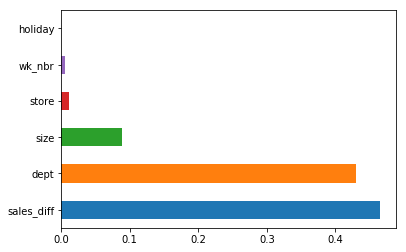

In [40]:
# Generating graph for importance of variables
model = GradientBoostingRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of GradientBoostingRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

# Feature Selection

In [41]:
series = (raw_final_data[['date','weekly_sales']])
raw_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 201025_11 to 20121026_4598
Data columns (total 12 columns):
date            421570 non-null datetime64[ns]
store           421570 non-null int64
dept            421570 non-null int64
size            421570 non-null int64
holiday         421570 non-null int64
day             421570 non-null int64
wk_nbr          421570 non-null int64
month           421570 non-null int64
year            421570 non-null int64
quarter         421570 non-null int64
sales_diff      421570 non-null float64
weekly_sales    421570 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 51.8+ MB


In [42]:
# display first few rows
series.head()

,date,weekly_sales
index,,
201025_11,2010-02-05,24924.50
2010212_11,2010-02-12,46039.49
2010219_11,2010-02-19,41595.55
2010226_11,2010-02-26,19403.54
201035_11,2010-03-05,21827.90


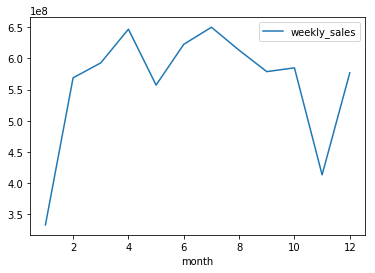

In [43]:
# date vs sales
temp_data = raw_final_data[['month','weekly_sales']].groupby('month').sum()
temp_data.plot()

In [44]:
# We can see a clear seasonality in data.
# Creating stationary data (data after removal of seasonality) so that we can identify any other hidden patterns in data
# The period of the seasonality appears to be one year (52 weeks, during chirstmas)
# seasonal difference
differenced = series.diff(48)
# trim off the first year of empty data
differenced = differenced[48:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv')

In [45]:
# plot differenced dataset
differenced.drop(columns='date',inplace=True, axis=1)
differenced.reset_index(inplace=True)
differenced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421522 entries, 0 to 421521
Data columns (total 2 columns):
index           421522 non-null object
weekly_sales    421522 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.4+ MB


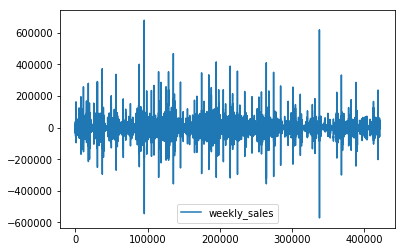

In [46]:
differenced.plot()
plt.show()